In [59]:
!pip install wordcloud
!pip install plotly

#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns
import geopandas as gpd
import wordcloud
import plotly.express as px
import folium


from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from itertools import combinations
from collections import Counter

In [4]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Loading the raw data
file_path = '/content/drive/MyDrive/Colab Notebooks/Extraction_2/Sample_-_Superstore.csv'


# Read the dataset using the file_path
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
data.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [6]:
data.describe(include= "all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [7]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
data.shape

(9994, 21)

In [13]:
data.isnull().any(), data.isnull().duplicated().any()

(Row ID           False
 Order ID         False
 Order Date       False
 Ship Date        False
 Ship Mode        False
 Customer ID      False
 Customer Name    False
 Segment          False
 Country          False
 City             False
 State            False
 Postal Code      False
 Region           False
 Product ID       False
 Category         False
 Sub-Category     False
 Product Name     False
 Sales            False
 Quantity         False
 Discount         False
 Profit           False
 dtype: bool,
 True)

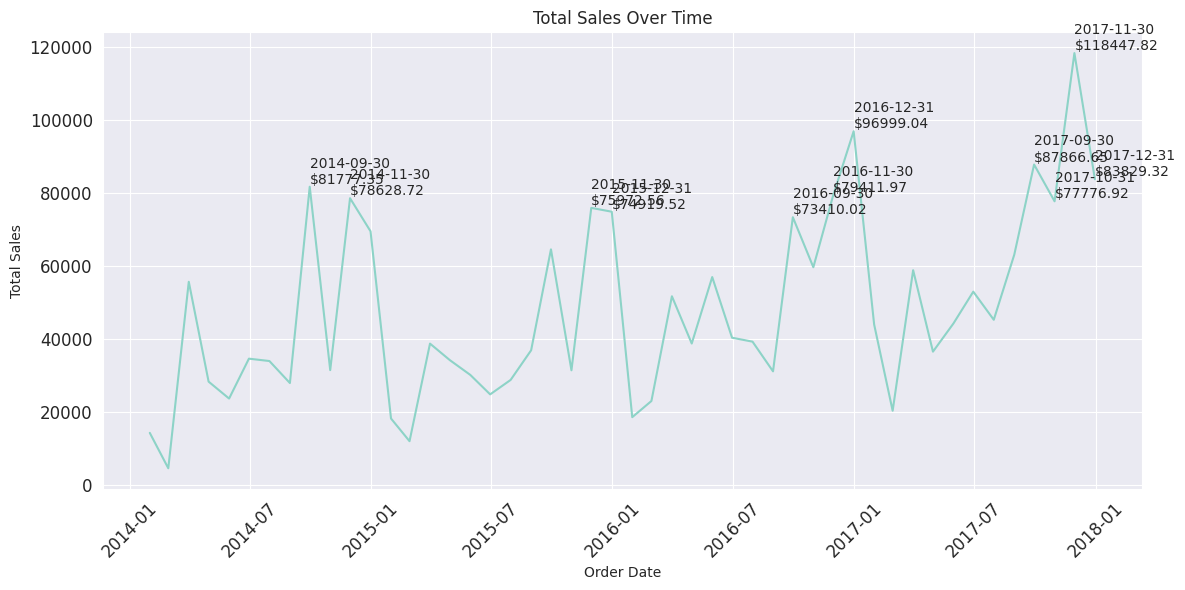

In [31]:
#Total sales over time (Line Chart)
# Convert 'Order Date' column to datetime format if it's not already
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Group the data by 'Order Date' and calculate the total sales for each date
daily_sales = data.groupby('Order Date')['Sales'].sum().reset_index()
# Group the data by a larger time interval, e.g., months, and calculate total sales
monthly_sales = data.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()
#the line chart
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")  # Optional: Setting the style for the plot

# Plotting the data
sns.lineplot(x='Order Date', y='Sales', data=monthly_sales)
sns.set_palette("Set3")  # Choose a color palette

# Label the axes and add a title
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')


# Add data labels for points above the threshold
# threshold_value = data['Sales'].mean()
threshold_value = 70000
for index, row in monthly_sales.iterrows():
    if row['Sales'] > threshold_value:
        plt.text(row['Order Date'], row['Sales'], f"{row['Order Date'].strftime('%Y-%m-%d')}\n${row['Sales']:.2f}", fontsize=10, ha='left', va='bottom')

# Show the plot
plt.xticks(rotation=45, fontsize = 12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

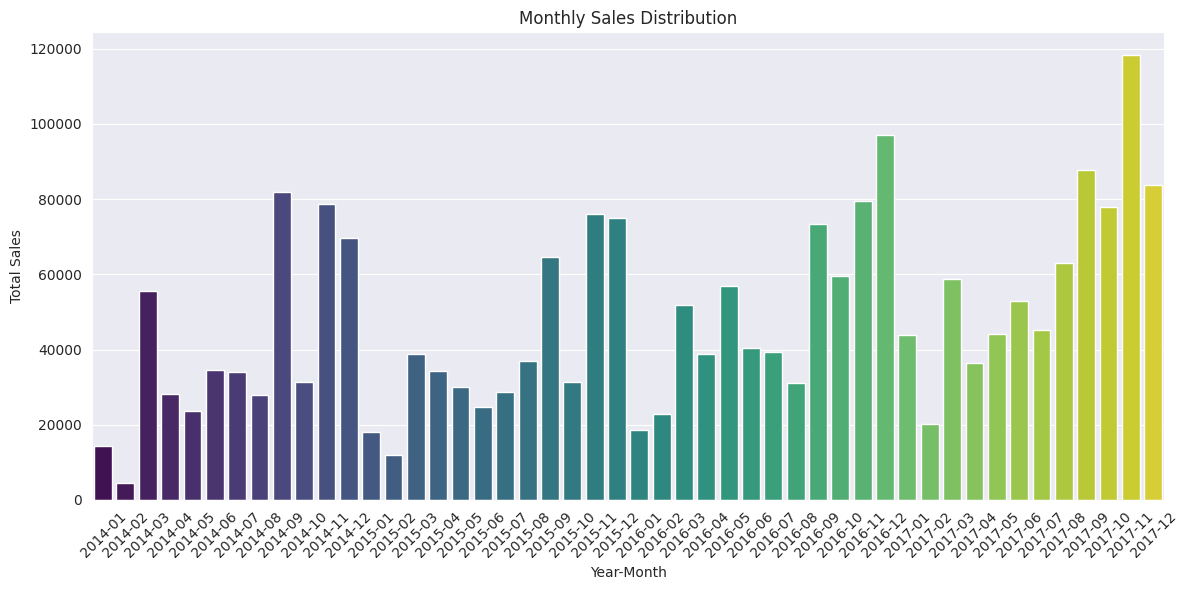

In [32]:
#Monthly sales distribution (bar chart).
# Convert 'Order Date' column to datetime format if it's not alread
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract the month and year from the 'Order Date' column
data['YearMonth'] = data['Order Date'].dt.to_period('M')

# Group the data by 'YearMonth' and calculate the total sales for each month
monthly_sales = data.groupby('YearMonth')['Sales'].sum().reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")  # Optional: Set the style for the plot

# Plot the data
sns.barplot(x='YearMonth', y='Sales', data=monthly_sales, palette='viridis')

# Label the axes and add a title
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Distribution')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

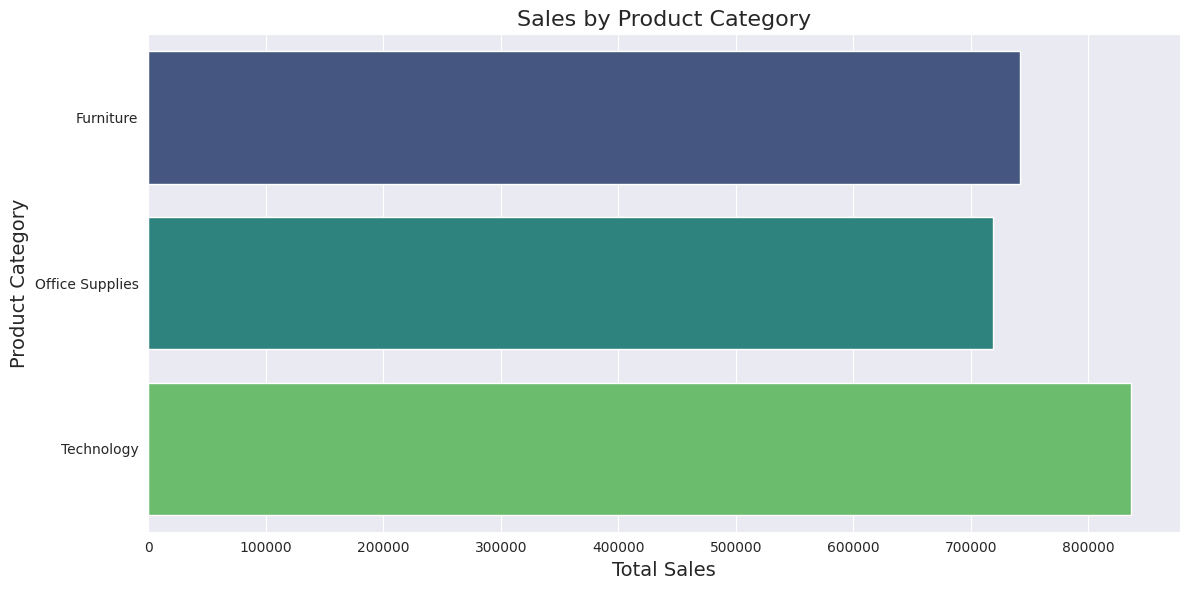

In [40]:
#Sales by product category (barchart).
# Create a bar chart of sales by product category
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")  # Optional: Set the style for the plot

# Group the data by 'Category' and calculate the total sales for each category
category_sales = data.groupby('Category')['Sales'].sum().reset_index()

# Create the bar chart
sns.barplot(x='Sales', y='Category', data=category_sales, palette='viridis')

# Label the axes and add a title
plt.xlabel('Total Sales',fontsize = 14)
plt.ylabel('Product Category', fontsize = 14)
plt.title('Sales by Product Category', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

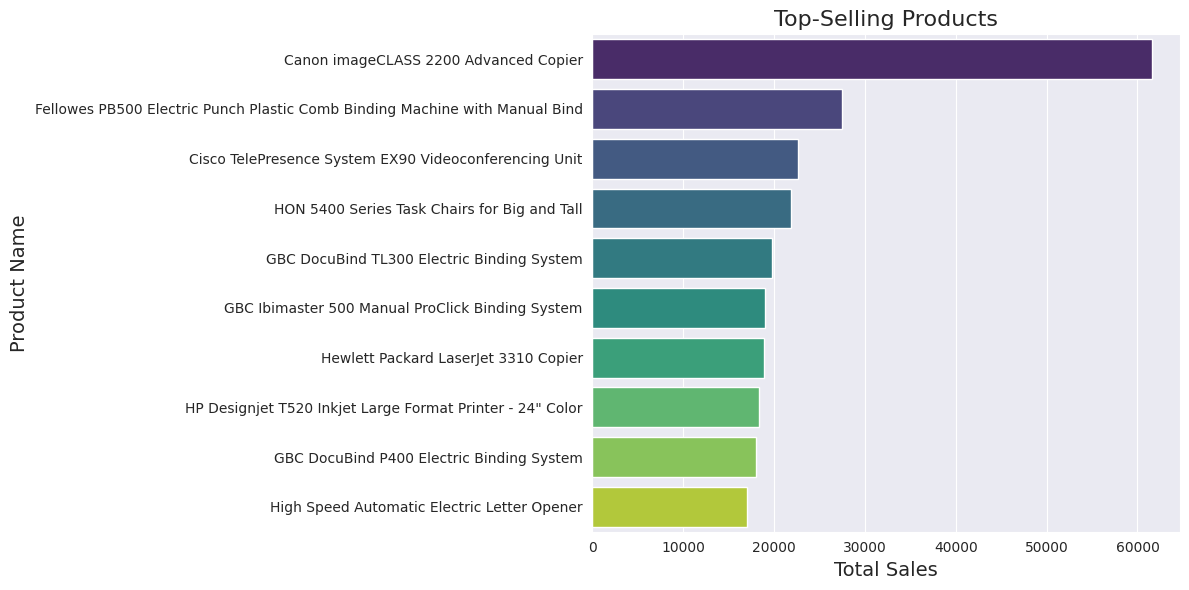

In [42]:
#Top-selling products (bar chart).
# Group the data by 'Product Name' and calculate the total sales for each product
product_sales = data.groupby('Product Name')['Sales'].sum().reset_index()

# Sort the products by sales in descending order to find the top-selling products
top_selling_products = product_sales.sort_values(by='Sales', ascending=False).head(10)  # Adjust the number as needed

# Create a bar chart of the top-selling products
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")  # Optional: Set the style for the plot

# Create the bar chart
sns.barplot(x='Sales', y='Product Name', data=top_selling_products, palette='viridis')

# Label the axes and add a title
plt.xlabel('Total Sales', fontsize =14)
plt.ylabel('Product Name', fontsize = 14)
plt.title('Top-Selling Products', fontsize = 16)

# Show the plot
plt.tight_layout()
plt.show()

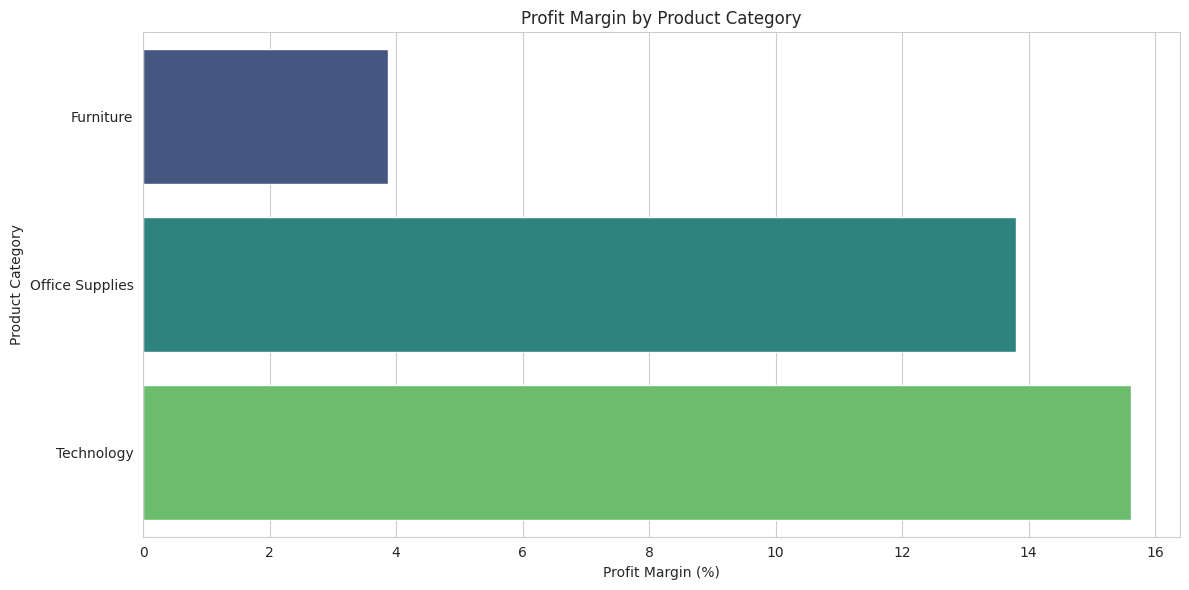

In [44]:
#Profit margin by product category (barchart).
# Calculate the profit margin by product category
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

# Group the data by 'Category' and calculate the mean profit margin for each category
category_profit_margin = data.groupby('Category')['Profit Margin'].mean().reset_index()

# Create a bar chart of profit margin by product category
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Optional: Set the style for the plot

# Create the bar chart
sns.barplot(x='Profit Margin', y='Category', data=category_profit_margin, palette='viridis')

# Label the axes and add a title
plt.xlabel('Profit Margin (%)')
plt.ylabel('Product Category')
plt.title('Profit Margin by Product Category')

# Show the plot
plt.tight_layout()
plt.show()

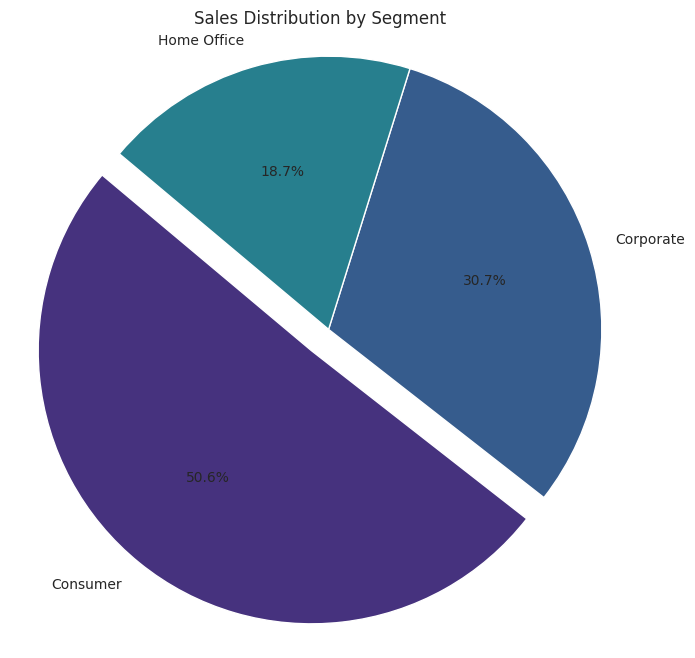

In [47]:
#Sales distribution by segment (piechart).
# Group the data by 'Segment' and calculate the total sales for each segment
segment_sales = data.groupby('Segment')['Sales'].sum().reset_index()

# Create a pie chart of sales distribution by segment
plt.figure(figsize=(8, 8))

# Define the labels and explode a segment for emphasis if needed
labels = segment_sales['Segment']
sizes = segment_sales['Sales']
explode = (0.1, 0, 0)  # You can adjust the explode value for emphasis


#define Seaborn color palette to use
colors = sns.color_palette('viridis')


# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors = colors, startangle=140, explode=explode)

# Add a title
plt.title('Sales Distribution by Segment')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

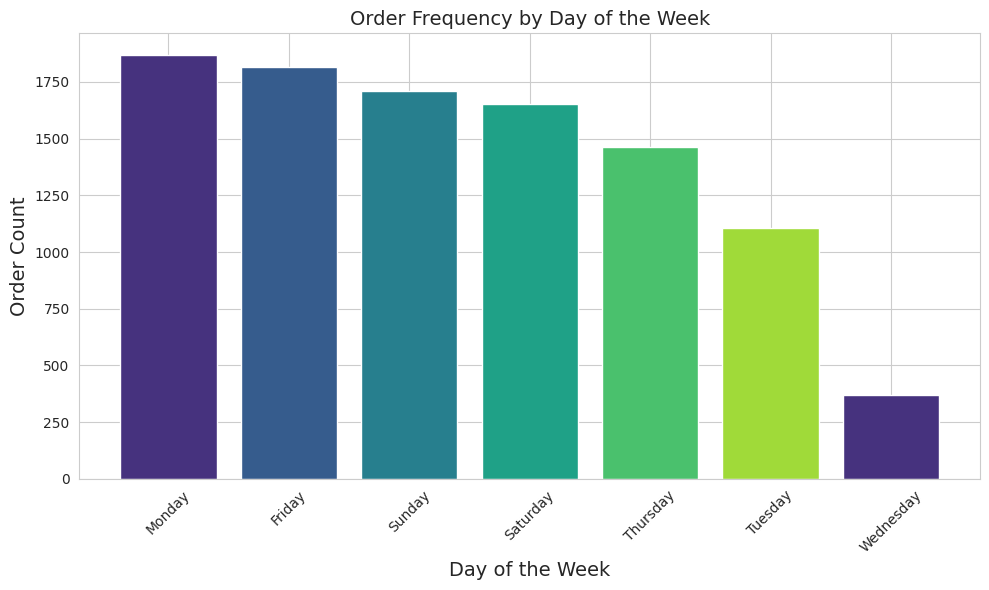

In [50]:
#Order frequency by day of the week (barchart).
# Convert 'Order Date' column to datetime format if it's not already
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract the day of the week from the 'Order Date' column
data['DayOfWeek'] = data['Order Date'].dt.day_name()

# Count the orders for each day of the week
day_order_count = data['DayOfWeek'].value_counts().reset_index()
day_order_count.columns = ['DayOfWeek', 'Order Count']

# Create a bar chart of order frequency by day of the week
plt.figure(figsize=(10, 6))

#define the color pallete
color = sns.color_palette('viridis')
# Create the bar chart
plt.bar(day_order_count['DayOfWeek'], day_order_count['Order Count'], color = color)

# Label the axes and add a title
plt.xlabel('Day of the Week',fontsize = 14)
plt.ylabel('Order Count', fontsize = 14)
plt.title('Order Frequency by Day of the Week', fontsize = 14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

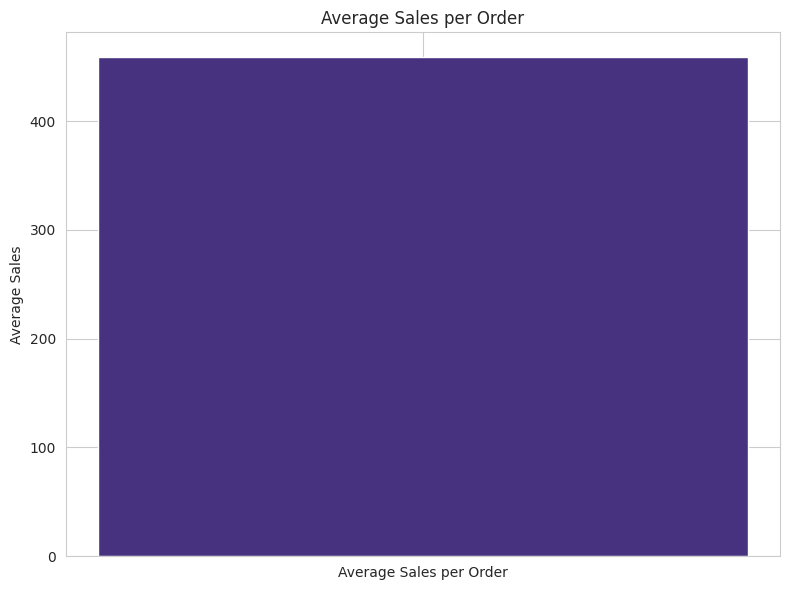

In [51]:
#Average sales per order (barchart).
# Calculate the average sales per order
average_sales_per_order = data.groupby('Order ID')['Sales'].sum().mean()

# Create a bar chart of the average sales per order
plt.figure(figsize=(8, 6))

# Create the bar chart
color = sns.color_palette('viridis')
plt.bar(['Average Sales per Order'], [average_sales_per_order], color=color)

# Label the axes and add a title
plt.ylabel('Average Sales')
plt.title('Average Sales per Order')

# Show the plot
plt.tight_layout()
plt.show()

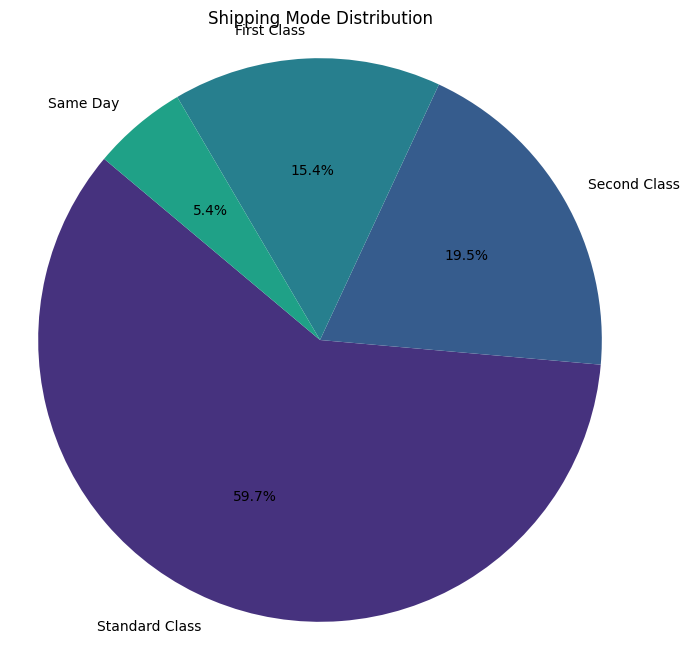

In [6]:
#Shipping mode distribution (piechart)
# Count the occurrences of each shipping mode
shipping_mode_counts = data['Ship Mode'].value_counts()

# Create a pie chart of shipping mode distribution
plt.figure(figsize=(8, 8))

# Create the pie chart
color = sns.color_palette('viridis')
plt.pie(shipping_mode_counts, labels=shipping_mode_counts.index, autopct='%1.1f%%', startangle=140, colors=color)

# Add a title
plt.title('Shipping Mode Distribution')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

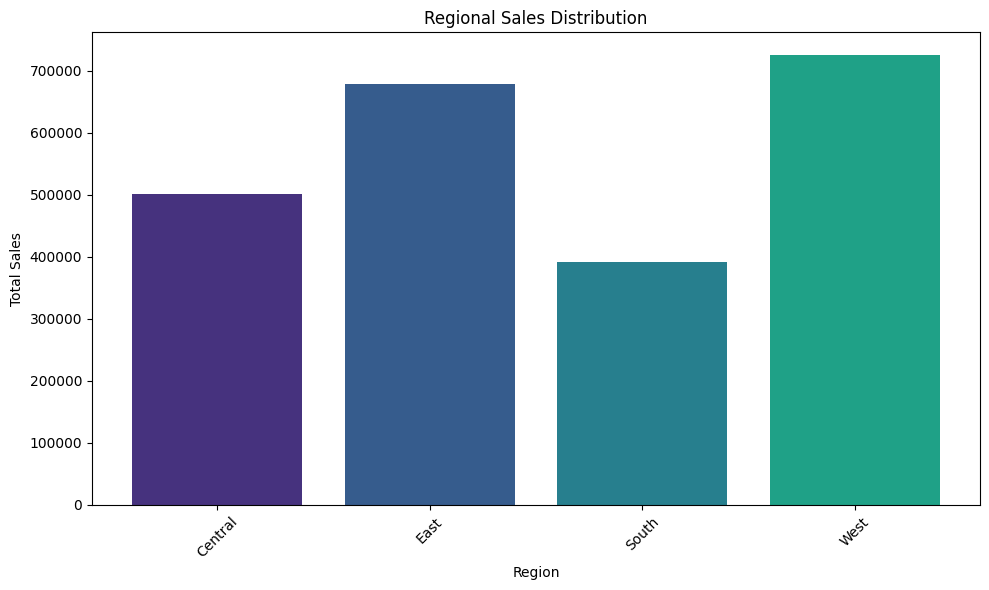

In [7]:
#Regional sales distribution (bar chart or map).
# Group the data by 'Region' and calculate the total sales for each region
region_sales = data.groupby('Region')['Sales'].sum().reset_index()

# Create a bar chart of regional sales distribution
plt.figure(figsize=(10, 6))

# Create the bar chart
color = sns.color_palette('viridis')
plt.bar(region_sales['Region'], region_sales['Sales'], color=color)

# Label the axes and add a title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Regional Sales Distribution')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Load a shapefile or GeoJSON file that contains the geographical information for regions
regions_geo = gpd.read_file('/content/sample_data/anscombe.json')

# Group the data by 'Region' and calculate the total sales for each region
region_sales = data.groupby('Region')['Sales'].sum().reset_index()

# Merge the sales data with the geographical data
merged_data = regions_geo.merge(region_sales, left_on='RegionName', right_on='Region')

# Create a map of regional sales distribution
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the map
merged_data.plot(column='Sales', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title
ax.set_title('Regional Sales Distribution')

# Show the map
plt.show()

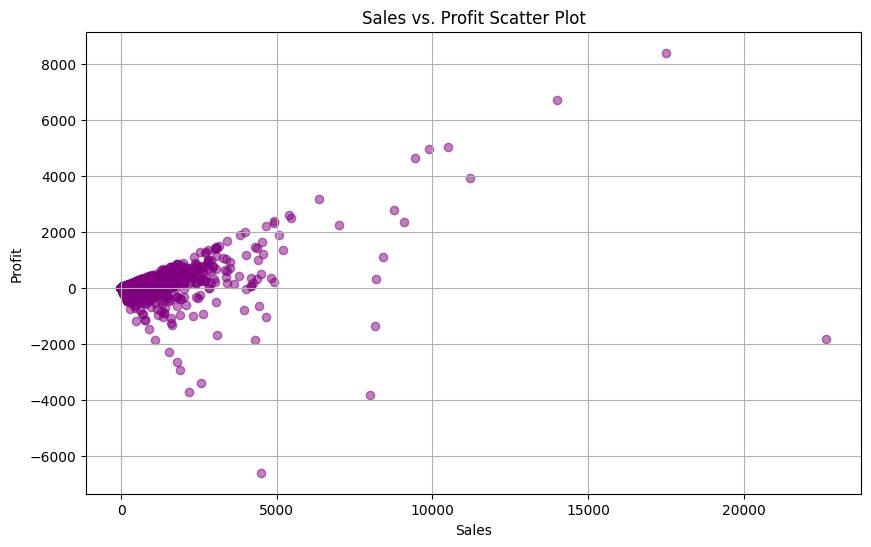

In [16]:
#Sales vs Profit (scatterplot)
# Create a scatter plot of Sales vs. Profit
plt.figure(figsize=(10, 6))
plt.scatter(data['Sales'], data['Profit'], alpha=0.5, color=['purple'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs. Profit Scatter Plot')
plt.grid(True)
plt.show()

In [13]:
data['Sales'].shape, data['Profit'].shape

((9994,), (9994,))

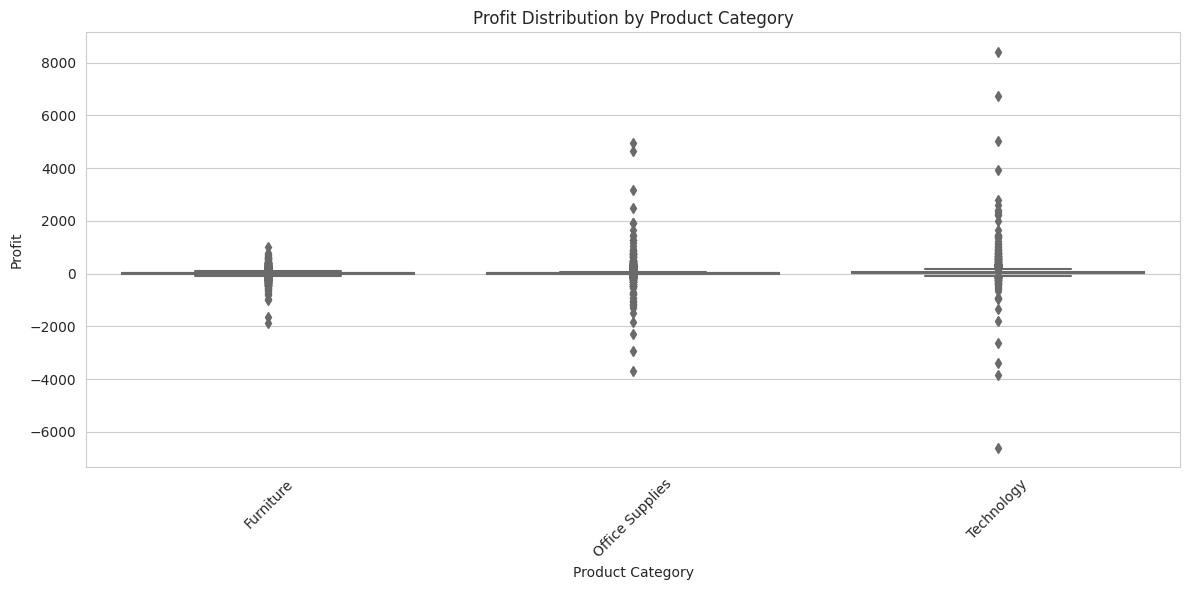

In [18]:
#Profit Distribution by Product Category (Box Plot)
superstore_data = data
# Create a box plot of Profit by Product Category
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the box plot
sns.boxplot(x='Category', y='Profit', data=superstore_data, palette='Set3')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.title('Profit Distribution by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

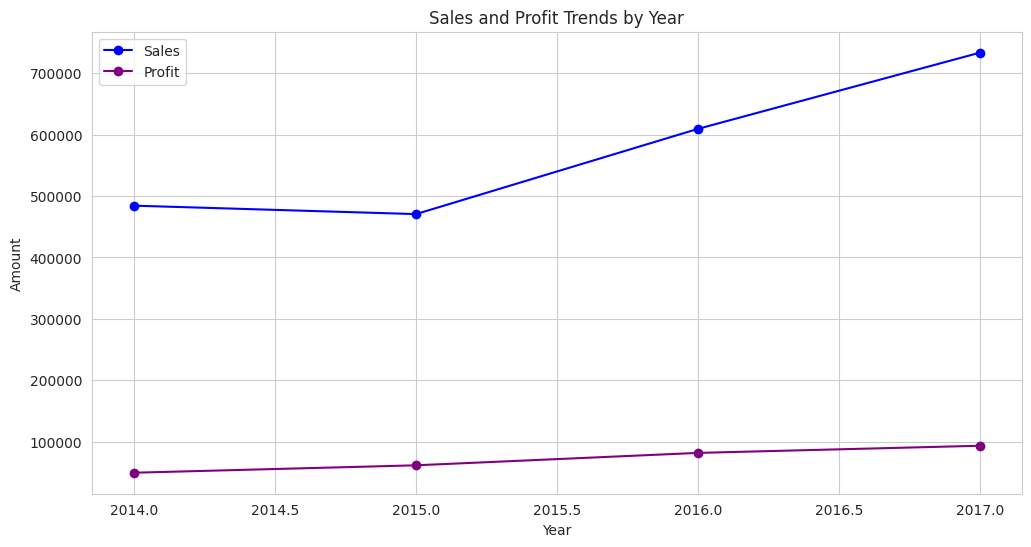

In [19]:
#Sales and Profit Trends by Year (Line Chart)
# Convert 'Order Date' column to datetime format if it's not already
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Extract the year from the 'Order Date' column
superstore_data['Year'] = superstore_data['Order Date'].dt.year

# Group the data by 'Year' and calculate total sales and profit for each year
yearly_sales_profit = superstore_data.groupby('Year')[['Sales', 'Profit']].sum()

# Create a line chart to show sales and profit trends by year
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales_profit.index, yearly_sales_profit['Sales'], marker='o', label='Sales', color='blue')
plt.plot(yearly_sales_profit.index, yearly_sales_profit['Profit'], marker='o', label='Profit', color='purple')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Sales and Profit Trends by Year')
plt.legend()
plt.grid(True)
plt.show()

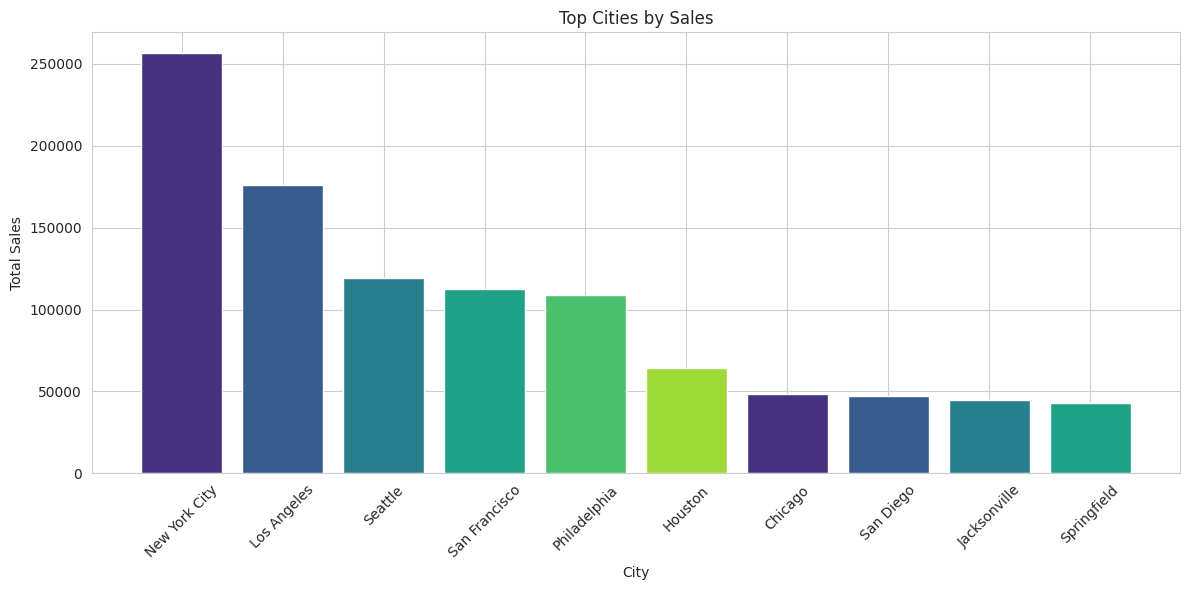

In [21]:
 #Top Cities by Sales (BarChart)
 # Group the data by 'City' and calculate total sales for each city
city_sales = superstore_data.groupby('City')['Sales'].sum().reset_index()

# Sort the cities by sales in descending order to find the top cities
top_cities = city_sales.sort_values(by='Sales', ascending=False).head(10)  # Adjust the number as needed

# Create a bar chart to show the top cities by sales
plt.figure(figsize=(12, 6))
plt.bar(top_cities['City'], top_cities['Sales'], color=color)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Top Cities by Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

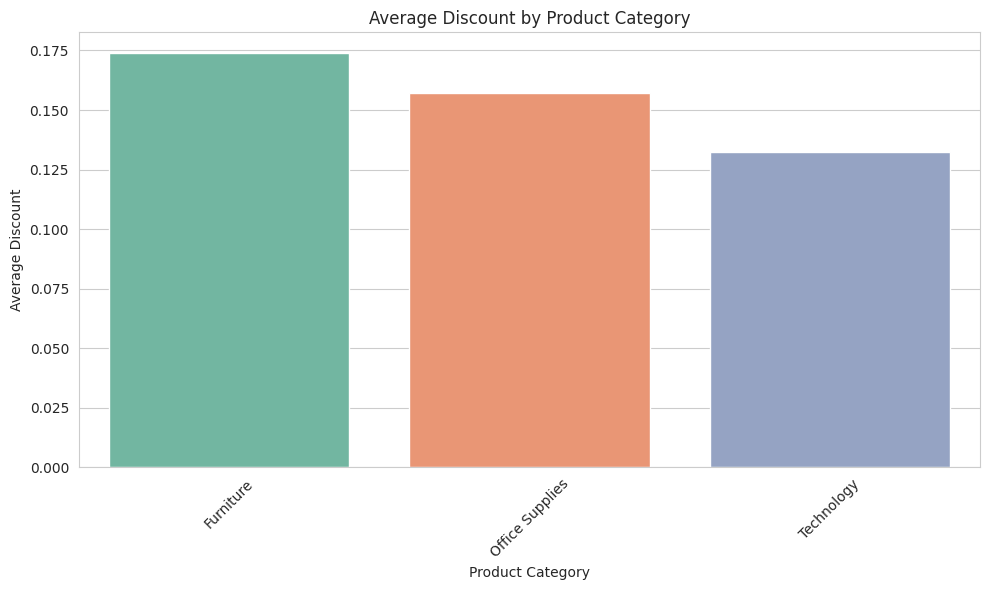

In [22]:
#Average Discount by Product Category (BarChart)
# Create a bar chart to show average discount by product category
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Calculate average discount by product category
avg_discount_by_category = superstore_data.groupby('Category')['Discount'].mean().reset_index()

# Create the bar chart
sns.barplot(x='Category', y='Discount', data=avg_discount_by_category, palette='Set2')
plt.xlabel('Product Category')
plt.ylabel('Average Discount')
plt.title('Average Discount by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Customer Distribution by State (Map)

# Group the data by 'State' and calculate the number of customers in each state
customer_distribution = superstore_data.groupby('State')['Customer ID'].nunique().reset_index()

# Merge the customer data with the state boundaries
merged_data = state_geo.merge(customer_distribution, left_on='StateName', right_on='State')

# Create a map of customer distribution by state
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the map
merged_data.plot(column='Customer ID', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Customer Distribution by State')
plt.show()

In [24]:
#Customer Lifetime Value Analysis

# Convert 'Order Date' column to datetime format if it's not already
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Calculate the CLV based on average sales per customer
clv_data = superstore_data.groupby('Customer ID')['Sales'].sum().reset_index()
average_clv = clv_data['Sales'].mean()

print(f'Average Customer Lifetime Value (CLV): ${average_clv:.2f}')


Average Customer Lifetime Value (CLV): $2896.85


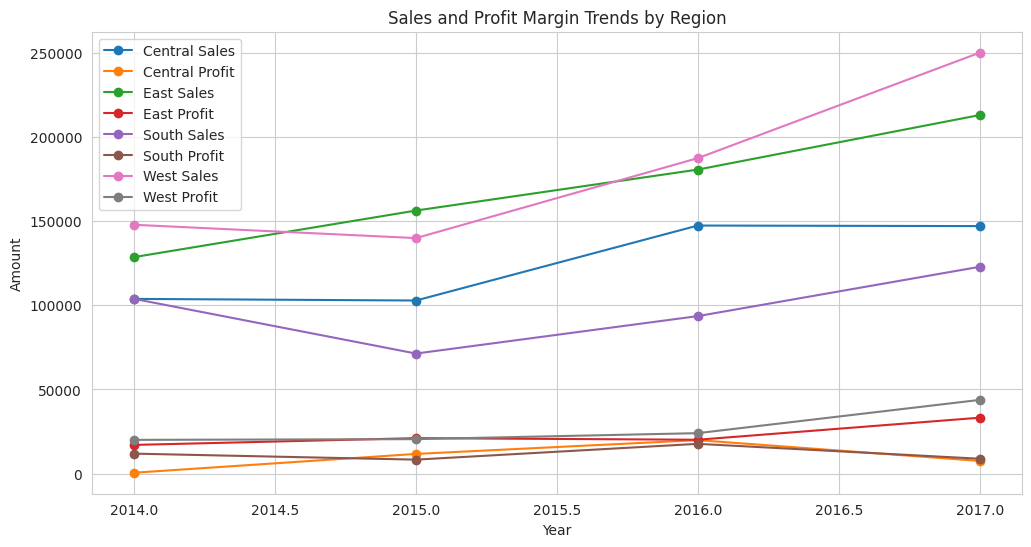

In [25]:
#Sales and Profit Margin Trends by Region (Line Chart)
# Convert 'Order Date' column to datetime format if it's not already
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Extract the year from the 'Order Date' column
superstore_data['Year'] = superstore_data['Order Date'].dt.year

# Group the data by 'Year' and 'Region' and calculate total sales and profit margin for each
region_sales_profit = superstore_data.groupby(['Year', 'Region'])[['Sales', 'Profit']].sum().reset_index()

# Create line charts to show sales and profit margin trends by region over the years
plt.figure(figsize=(12, 6))
for region in region_sales_profit['Region'].unique():
    region_data = region_sales_profit[region_sales_profit['Region'] == region]
    plt.plot(region_data['Year'], region_data['Sales'], marker='o', label=f'{region} Sales')
    plt.plot(region_data['Year'], region_data['Profit'], marker='o', label=f'{region} Profit')

plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Sales and Profit Margin Trends by Region')
plt.legend()
plt.grid(True)
plt.show()



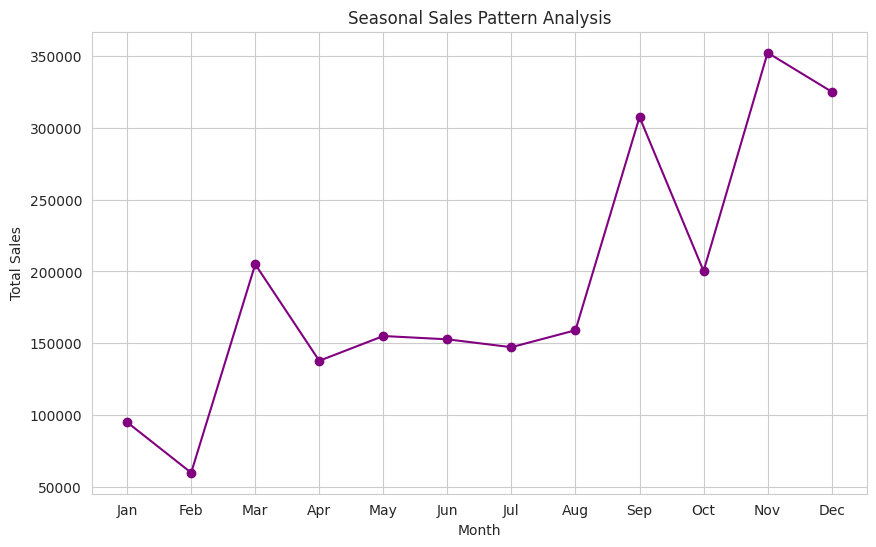

In [28]:
#Seasonal Sales Pattern Analysis
# Convert 'Order Date' column to datetime format if it's not already
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Extract the month from the 'Order Date' column
superstore_data['Month'] = superstore_data['Order Date'].dt.month

# Group the data by 'Month' and calculate total sales for each month
monthly_sales = superstore_data.groupby('Month')['Sales'].sum().reset_index()

# Create a line chart to show the seasonal sales pattern
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', color='purple')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Seasonal Sales Pattern Analysis')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


In [29]:
#Customer Loyalty Analysis Based on Order Frequency

# Group the data by 'Customer ID' and calculate the order frequency for each customer
customer_order_frequency = superstore_data.groupby('Customer ID')['Order ID'].nunique().reset_index()

# Calculate the average order frequency
average_order_frequency = customer_order_frequency['Order ID'].mean()

print(f'Average Order Frequency: {average_order_frequency:.2f}')


Average Order Frequency: 6.32


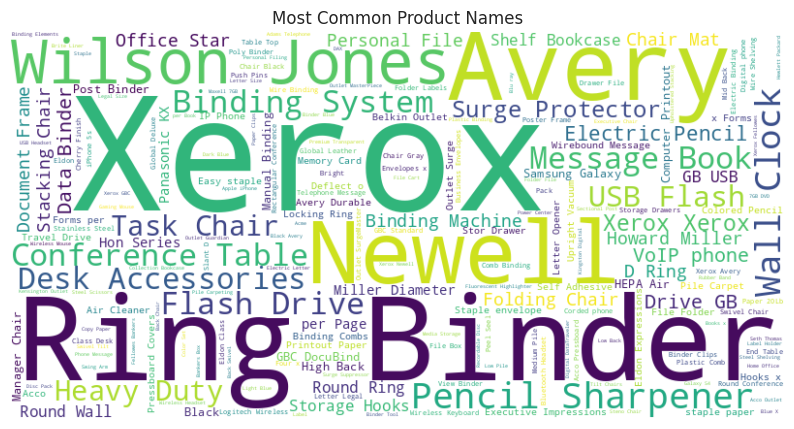

In [31]:
#Most Common Product Names (WordCloud)
# Combine product names into a single text
product_names_text = ' '.join(superstore_data['Product Name'])

# Generate a word cloud of the most common product names
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(product_names_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Product Names')
plt.show()


In [32]:
#Return Rate Analysis
# Calculate the return rate
total_orders = len(superstore_data)
returned_orders = len(superstore_data[superstore_data['Order ID'].duplicated()])
return_rate = (returned_orders / total_orders) * 100

print(f'Return Rate: {return_rate:.2f}%')

Return Rate: 49.88%


In [42]:
#Sales Contribution by Sub-Category (Sunburst Chart)
# Create a sunburst chart to show sales contribution by sub-category
fig = px.sunburst(superstore_data, path=['Category', 'Sub-Category'], values='Sales',)
fig.update_layout(title='Sales Contribution by Sub-Category')
fig.show()


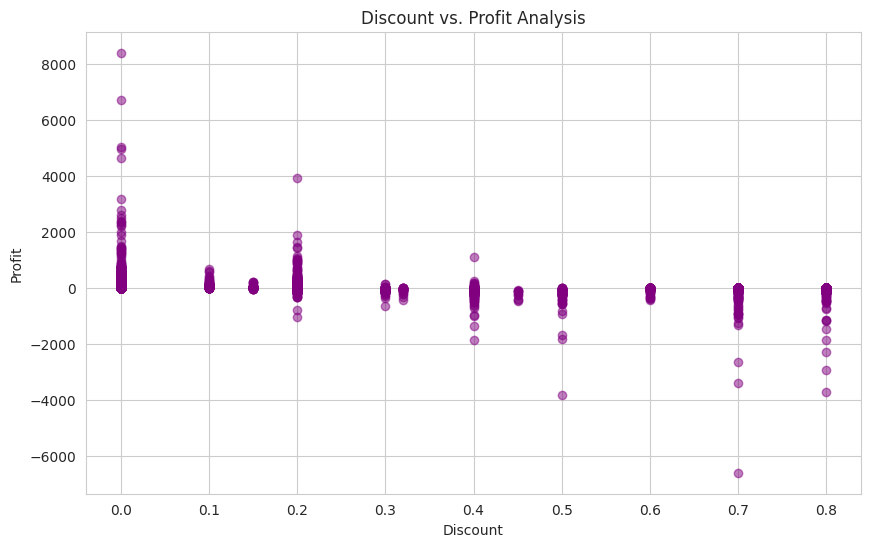

In [36]:
#Discount vs. Profit Analysis (Scatter Plot)
# Create a scatter plot of Discount vs. Profit
plt.figure(figsize=(10, 6))
plt.scatter(superstore_data['Discount'], superstore_data['Profit'], alpha=0.5, color='purple')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Discount vs. Profit Analysis')
plt.grid(True)
plt.show()

In [46]:
 #Customer Clustering Based on Purchase Behaviour

# Select relevant features for clustering, e.g., 'Sales', 'Profit', 'Discount', etc.
features = superstore_data[['Sales', 'Profit', 'Discount']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Choose the number of clusters (K) based on your requirements
k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
superstore_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Now, 'Cluster' column in 'superstore_data' contains cluster labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
#Customer Acquisition Cost Analysis
# Calculate the total marketing expenses within the specified period

marketing_data = superstore_data
start_date = 'YYYY-MM-DD'  # Replace with your start date
end_date = 'YYYY-MM-DD'  # Replace with your end date

marketing_expenses = marketing_data[(marketing_data['Order Date'] >= start_date) & (marketing_data['Order Date'] <= end_date)]['Expense'].sum()

# Assuming you have a DataFrame called 'customer_data' with customer information, including acquisition dates

# Calculate the number of new customers acquired within the same period
new_customers = customer_data[(customer_data['Acquisition Date'] >= start_date) & (customer_data['Acquisition Date'] <= end_date)]['Customer ID'].nunique()

# Calculate the Customer Acquisition Cost (CAC)
cac = marketing_expenses / new_customers

print(f'Customer Acquisition Cost (CAC): ${cac:.2f}')


In [52]:
#Churn Rate Analysis
# Convert 'Order Date' column to datetime format if it's not already
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Define the churn threshold (e.g., 365 days without a purchase)
churn_threshold = pd.DateOffset(days=365)

# Calculate the current date as the max date in the dataset
current_date = superstore_data['Order Date'].max()

# Calculate the churn date as the current date minus the churn threshold
churn_date = current_date - churn_threshold

# Identify customers who haven't made a purchase since the churn date
churned_customers = superstore_data[superstore_data['Order Date'] < churn_date]['Customer ID'].unique()

# Calculate the total number of customers at the beginning of the period
total_customers_at_start = superstore_data[superstore_data['Order Date'] < churn_date]['Customer ID'].nunique()

# Calculate the number of churned customers
churned_customer_count = len(churned_customers)

# Calculate the churn rate as a percentage
churn_rate = (churned_customer_count / total_customers_at_start) * 100

print(f'Churn Rate: {churn_rate:.2f}%')


Churn Rate: 100.00%


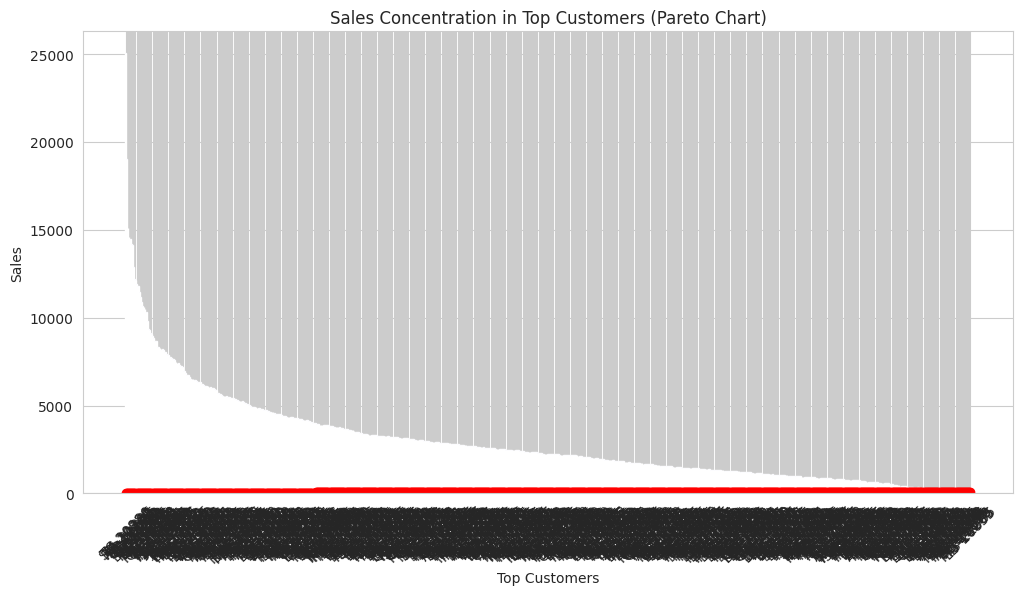

In [53]:
#Sales Concentration in Top Customers (Pareto Chart)
# Group the data by 'Customer ID' and calculate total sales for each customer
customer_sales = superstore_data.groupby('Customer ID')['Sales'].sum().reset_index()

# Sort customers by sales in descending order
customer_sales = customer_sales.sort_values(by='Sales', ascending=False)

# Calculate cumulative percentage of total sales
customer_sales['Cumulative Sales'] = customer_sales['Sales'].cumsum()
customer_sales['Cumulative Percentage'] = (customer_sales['Cumulative Sales'] / customer_sales['Sales'].sum()) * 100

# Create a Pareto chart to show sales concentration in top customers
plt.figure(figsize=(12, 6))
plt.bar(customer_sales['Customer ID'], customer_sales['Sales'], color='blue')
plt.plot(customer_sales['Customer ID'], customer_sales['Cumulative Percentage'], marker='o', color='red')

plt.xlabel('Top Customers')
plt.ylabel('Sales')
plt.title('Sales Concentration in Top Customers (Pareto Chart)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


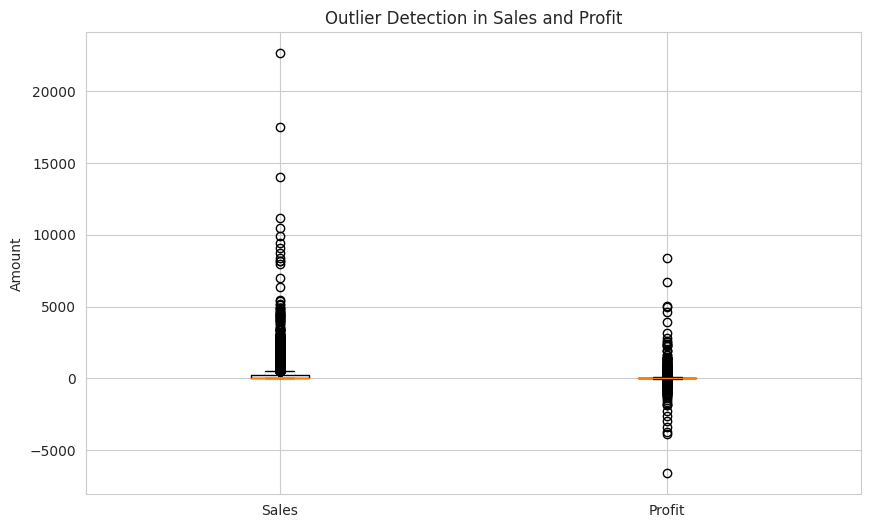

In [54]:
#Outlier Detection in Sales and Profit (Box Plot)
# Create box plots to visualize outliers in sales and profit
plt.figure(figsize=(10, 6))
plt.boxplot([superstore_data['Sales'], superstore_data['Profit']], labels=['Sales', 'Profit'])
plt.ylabel('Amount')
plt.title('Outlier Detection in Sales and Profit')
plt.show()


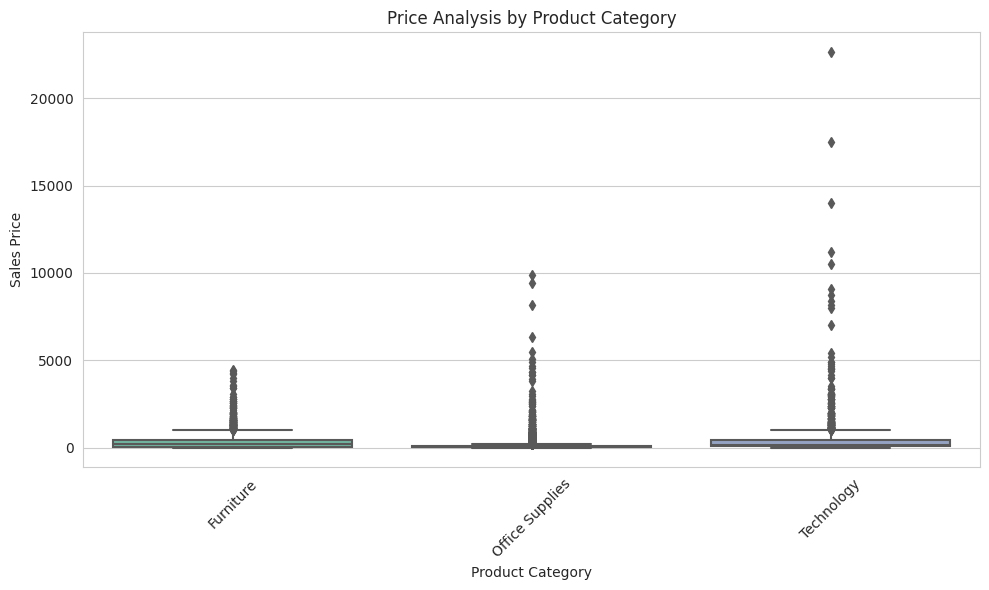

In [58]:
#Price Analysis by Product Category (Box Plot)
# Create a box plot to visualize price distribution by product category
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(x='Category', y='Sales', data=superstore_data, palette='Set2')
plt.xlabel('Product Category')
plt.ylabel('Sales Price')
plt.title('Price Analysis by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Customer Location Density Heatmap
# Assuming you have a DataFrame called 'customer_locations' with latitude and longitude columns

# Create a map centered at a location of your choice
m = folium.Map(location=[0, 0], zoom_start=2)

# Convert the customer locations to a list of [latitude, longitude] pairs
locations = customer_locations[['Latitude', 'Longitude']].values.tolist()

# Create a heatmap layer
HeatMap(locations).add_to(m)

# Show the heatmap
m


In [ ]:
#Product Building Analysis
# Group products purchased together by order
order_products = superstore_data.groupby('Order ID')['Product Name'].apply(list)

# Create a list of all product combinations
all_combinations = []
for products in order_products:
    if len(products) > 1:
        all_combinations.extend(list(combinations(products, 2)))

# Calculate the frequency of each product combination
combination_counts = Counter(all_combinations)

# Get the most common product combinations
top_combinations = combination_counts.most_common(10)  # Change the number as needed

# Extract product combinations and their frequencies
product_combinations = [comb[0] for comb in top_combinations]
frequencies = [comb[1] for comb in top_combinations]

# Create a bar chart to visualize the top product combinations
plt.figure(figsize=(12, 6))
plt.bar(product_combinations, frequencies, color='skyblue')
plt.xlabel('Product Combinations')
plt.ylabel('Frequency')
plt.title('Top Product Bundles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

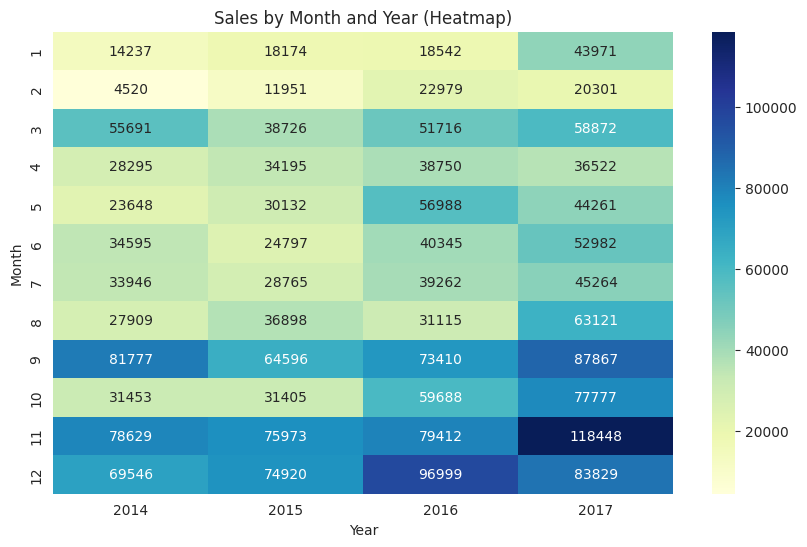

In [62]:
#Sales by Month and Year (Heatmap)
# Convert 'Order Date' column to datetime format if it's not already
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Extract month and year from the 'Order Date' column
superstore_data['Month'] = superstore_data['Order Date'].dt.month
superstore_data['Year'] = superstore_data['Order Date'].dt.year

# Pivot the data to create a matrix of sales by month and year
sales_by_month_year = superstore_data.pivot_table(index='Month', columns='Year', values='Sales', aggfunc=np.sum)

# Create a heatmap to visualize sales by month and year
plt.figure(figsize=(10, 6))
sns.heatmap(sales_by_month_year, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Sales by Month and Year (Heatmap)')
plt.show()


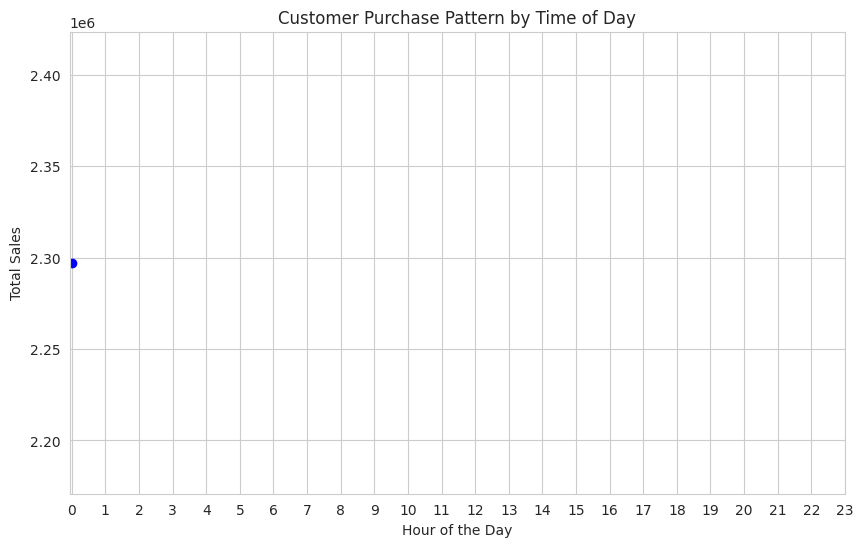

In [63]:
#Customer Purchase Pattern by Time of Day
# Convert 'Order Date' column to datetime format if it's not already
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Extract the hour from the 'Order Date' column
superstore_data['Hour'] = superstore_data['Order Date'].dt.hour

# Group the data by hour and calculate total sales for each hour
hourly_sales = superstore_data.groupby('Hour')['Sales'].sum()

# Create a line chart to show customer purchase pattern by time of day
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Customer Purchase Pattern by Time of Day')
plt.xticks(range(24))
plt.grid(True)
plt.show()
